## 보완 필요하다고 생각하는 부분(팀원들의 의견 필요)
### 1. 주요 지표 선택
### → 어떤 지표를 선택해서 시각화 할 것인가?
### → 금리, 환율, 외환보유액, 경상수지 이외에 추가할 지표
### → 이미 추가한 네 가지 지표 중에서 굳이 필요없다고 생각하는 지표
### 2. 지금 작성해놓은 시각화 자료 중에 불필요하다고 생각하는 부분
### → 지금 만들어놓은 자료는 막상 그래프는 많지만 정말 중요한 지표라고 생각이 들지는 않음
### → 말 그대로 대략적인 개요로써 작성한 그래프들이기 때문에 많은 보완이 필요하다는 생각
### 회귀분석

## - 분석 목표 : 현재 상황이 외환위기로 이어질 것인가?
## - 주의점 : 외환위기는 단순 경제침체와는 다른 개념
### → 한국이 경험한 외환위기는 1997년 IMF 구제금융 요청
### → 한국이 경험한 세계적 경기침체는 2008년 대침체(세계 금융위기)
### → 두 시기의 지표를 시각화하여 비교하여 두 개념의 차이점 확인
### → 두 시기의 지표와 현재 지표를 비교하여 현재 상황이 어디에 가까운지 확인이 필요함

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글
import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

# - 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

# 컬럼 표시 제한
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_excel('./korea_economy.xlsx')

## - 미국, 일본, 중국, 한국 데이터를 각각 나눠서 새로운 df 생성

In [3]:
# 미국
df_usa = data.iloc[:, [1, 2, 6, 9, 10, 12, 17, 24, 29, 34]]
result = []
for i in df_usa['년월']:
    result.append(i.split('/')[0])
df_usa.insert(1, '년도', result)


# 일본
df_japan = data.iloc[:, [1, 3, 8, 13, 18, 21, 25, 30, 35]]
result = []
for i in df_japan['년월']:
    result.append(i.split('/')[0])
df_japan.insert(1, '년도', result)


# 중국
df_china = data.iloc[:, [1, 4, 7, 14, 19, 22, 26, 36]]
result = []
for i in df_china['년월']:
    result.append(i.split('/')[0])
df_china.insert(1, '년도', result)


# 한국
df_korea = data.iloc[:, [1, 5, 6, 7, 8, 15, 20, 23, 27, 28, 31, 33, 37]]
result = []
for i in df_korea['년월']:
    result.append(i.split('/')[0])
df_korea.insert(1, '년도', result)

## - IMF 구제금융 요청(1997), 대침체(2008) 등 경제적 위기였던 시기를 추출하여 새로운 df 생성
### → 추출 범위 : 해당 시기가 발생하기 직전 1~2년을 추출
### → 이유 : 현재 상황이 외환위기가 될 것인지 예측하는 것이 목적이기 때문에 사건 발생 이후의 지표는 큰 의미가 없을 것
## - 추가 사항
### → 경제적 위기 상황들만 시각화하여 비교했을 경우 해당 지표에 대한 심각성을 쉽게 이해하기 어려움
### → 경제 호황 시기의 지표도 추출하여 호황 시기의 지표와 불황 시기의 지표 비교를 통해 불황 시기 지표의 심각성 극대화

In [4]:
# 불황
# IMF 전조 증상
IMF_k = df_korea.iloc[10:36, :]
IMF_k.reset_index(drop=True, inplace=True)

# 2008 글로벌 금융위기
global_dep = df_korea.iloc[144:168, :]
global_dep.reset_index(drop=True, inplace=True)

# 2022년 현재
ty = df_korea.iloc[324:331, :]
ty.reset_index(drop=True, inplace=True)

# 호황
# 나스닥, 코스피 최고점 기간(2021)
ly = df_korea.iloc[300:324, :]
ly.reset_index(drop=True, inplace=True)

## - 시각화에 사용할 지표 선정 → 외환위기를 판단하는 기준이 되는 주요 지표
### 1) 금리 
### 2) 환율
### 3) 경상수지
### 4) 외환보유액
### 5)

## 1) 금리
## - 지난 30년간 미국, 일본, 중국, 한국의 금리 변화

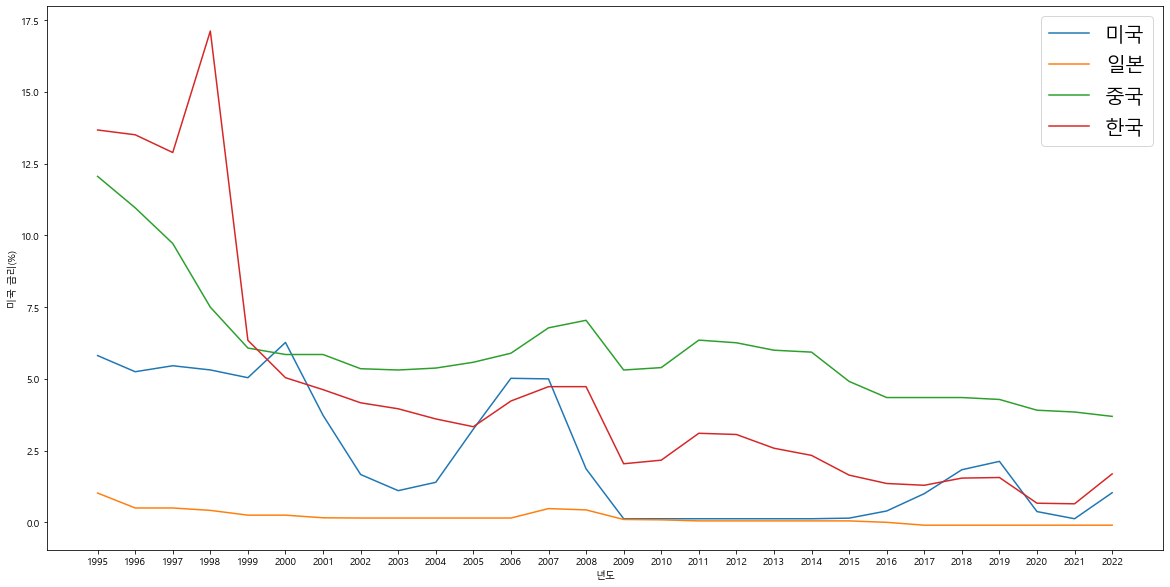

In [5]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_usa, x='년도', y='미국 금리(%)', errorbar=None, legend=True)
sns.lineplot(df_japan, x='년도', y='일본 금리(%)', errorbar=None, legend=True)
sns.lineplot(df_china, x='년도', y='중국 금리(%)', errorbar=None, legend=True)
sns.lineplot(df_korea, x='년도', y='한국 금리(%)', errorbar=None, legend=True)
plt.legend(['미국', '일본', '중국', '한국'], fontsize=20)
plt.show()

### → 위 그래프에 대한 해석 작성

## 2) 환율

## - 1997 ~ 2001 IMF 구제금융 요청(외환위기) 당시 한국의 환율

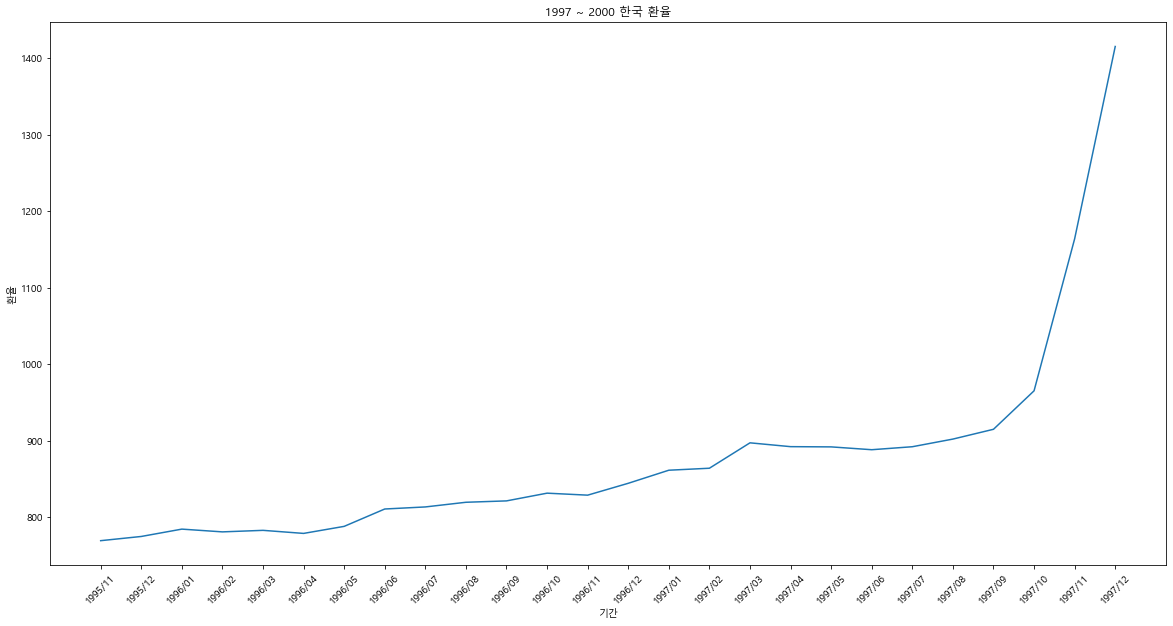

In [6]:
# 달러
plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_k, x='년월', y='원/미국달러(매매기준율)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

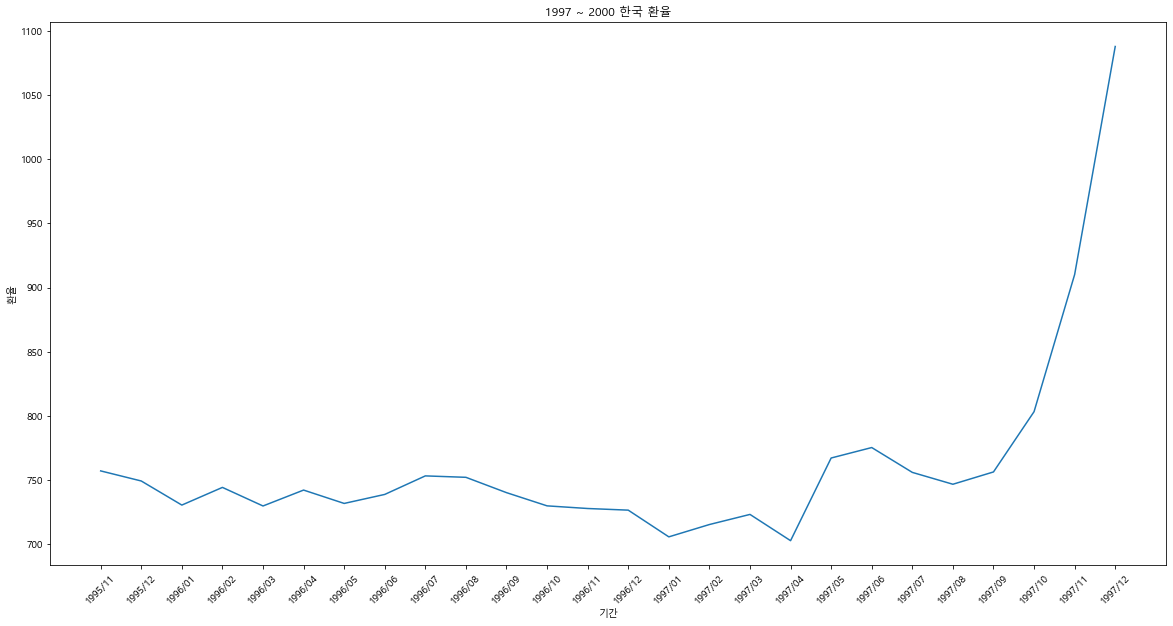

In [7]:
# 엔
plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_k, x='년월', y='원/일본엔(100엔)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

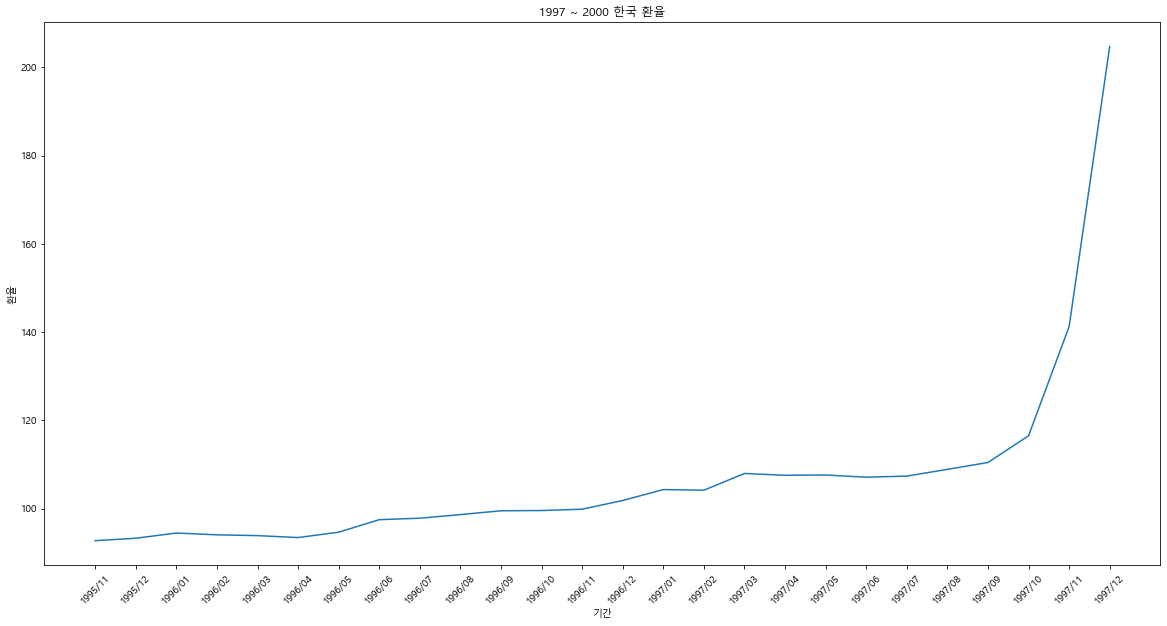

In [8]:
# 위안
plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_k, x='년월', y='원/위안(매매기준율)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

### → 시사하는 바 작성
### 
### 
### 
### 

## - 2008년 대침체(경제 불황) 당시 한국의 환율

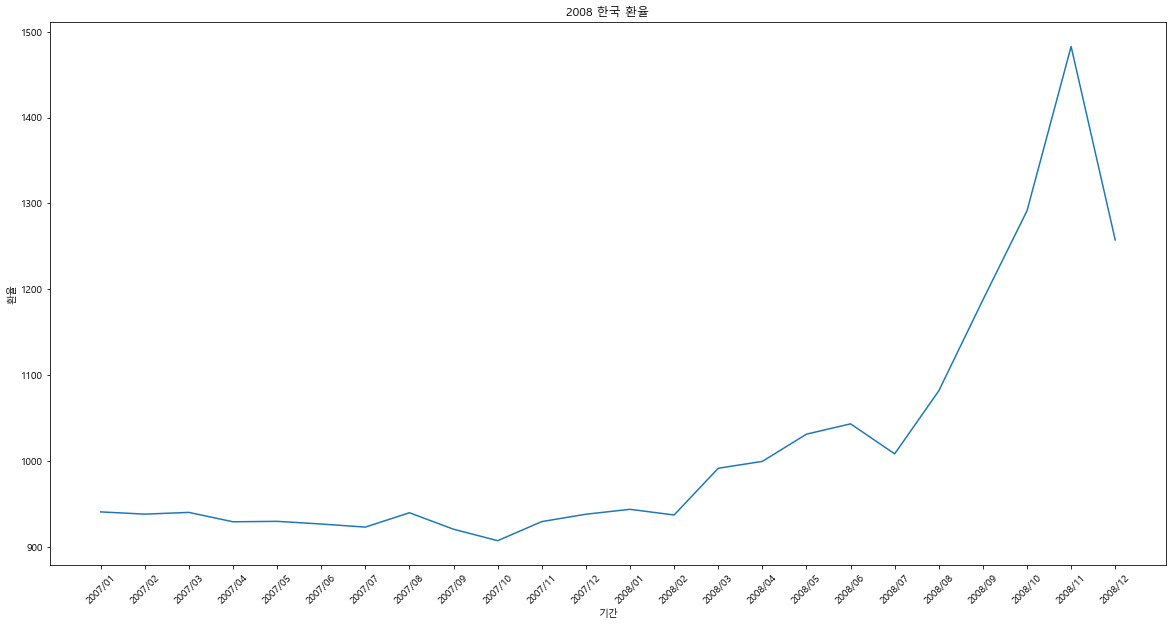

In [9]:
# 달러
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_dep, x='년월', y='원/미국달러(매매기준율)')
plt.xticks(rotation=45)

plt.title('2008 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

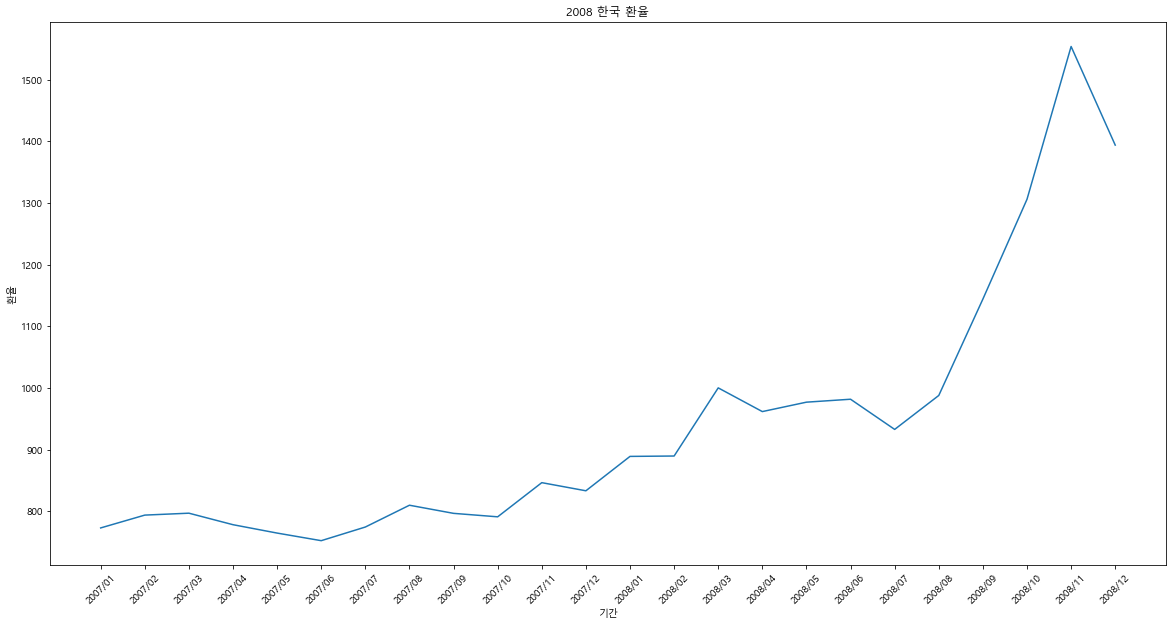

In [10]:
# 엔
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_dep, x='년월', y='원/일본엔(100엔)')
plt.xticks(rotation=45)

plt.title('2008 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

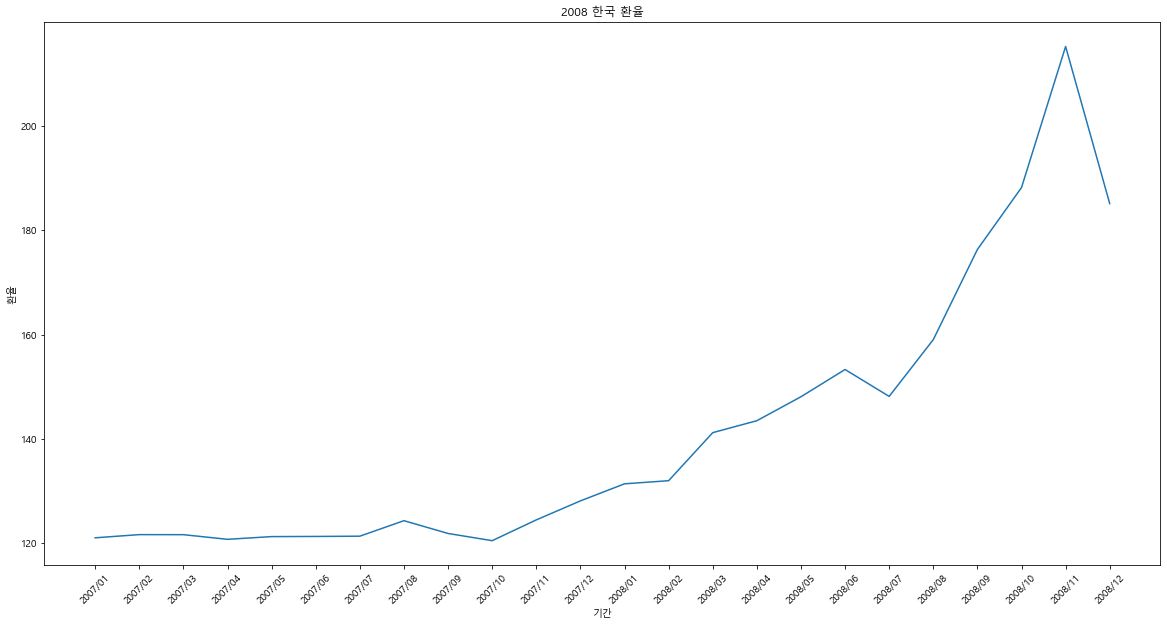

In [11]:
# 위안
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_dep, x='년월', y='원/위안(매매기준율)')
plt.xticks(rotation=45)

plt.title('2008 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

### → 시사하는 바 작성
### 
### 
### 
### 

## - 2022년 현재 한국의 환율

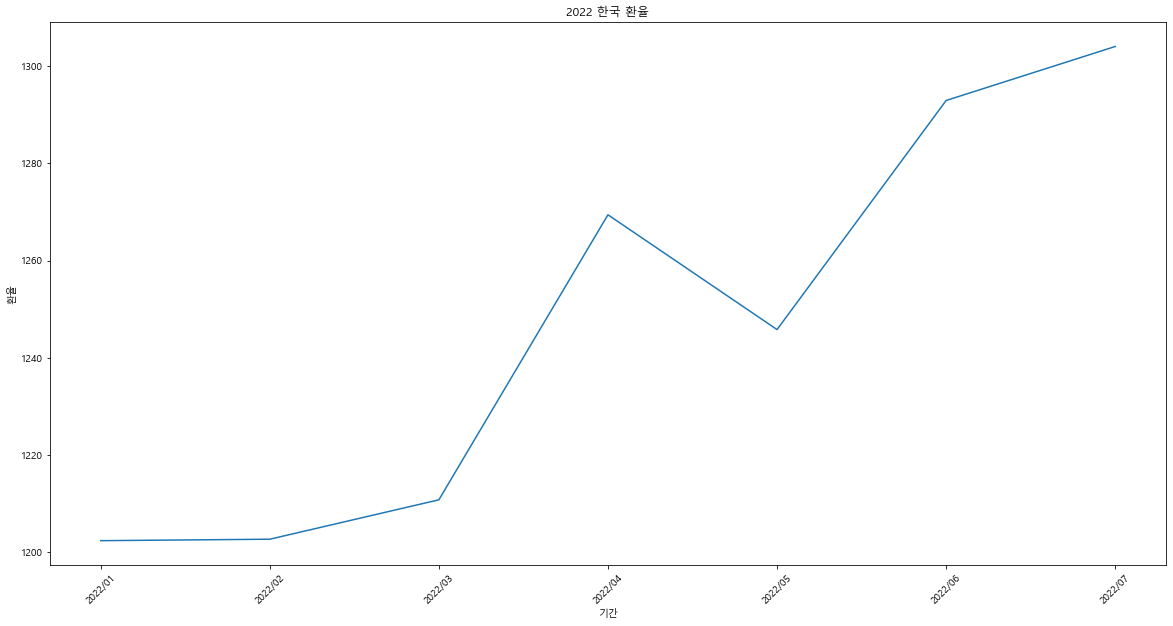

In [12]:
# 달러
plt.figure(figsize=(20, 10))
sns.lineplot(data=ty, x='년월', y='원/미국달러(매매기준율)')
plt.xticks(rotation=45)

plt.title('2022 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

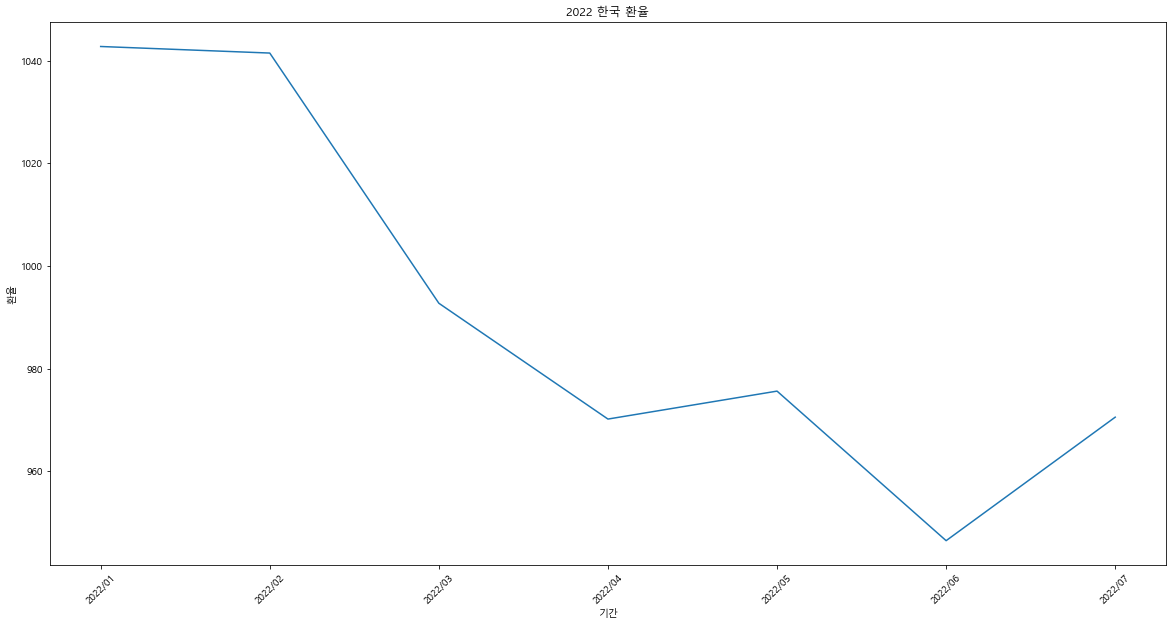

In [13]:
# 엔
plt.figure(figsize=(20, 10))
sns.lineplot(data=ty, x='년월', y='원/일본엔(100엔)')
plt.xticks(rotation=45)

plt.title('2022 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

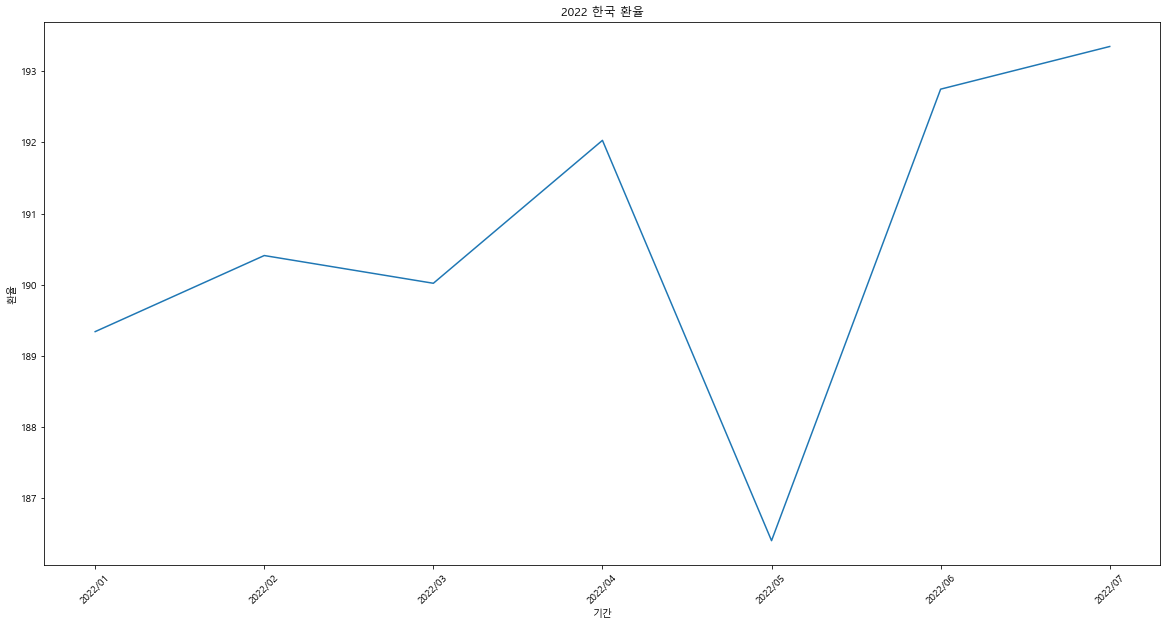

In [14]:
# 위안
plt.figure(figsize=(20, 10))
sns.lineplot(data=ty, x='년월', y='원/위안(매매기준율)')
plt.xticks(rotation=45)

plt.title('2022 한국 환율')
plt.xlabel('기간')
plt.ylabel('환율')
plt.show()

### → 시사하는 바 작성
### 
### 
### 
### 

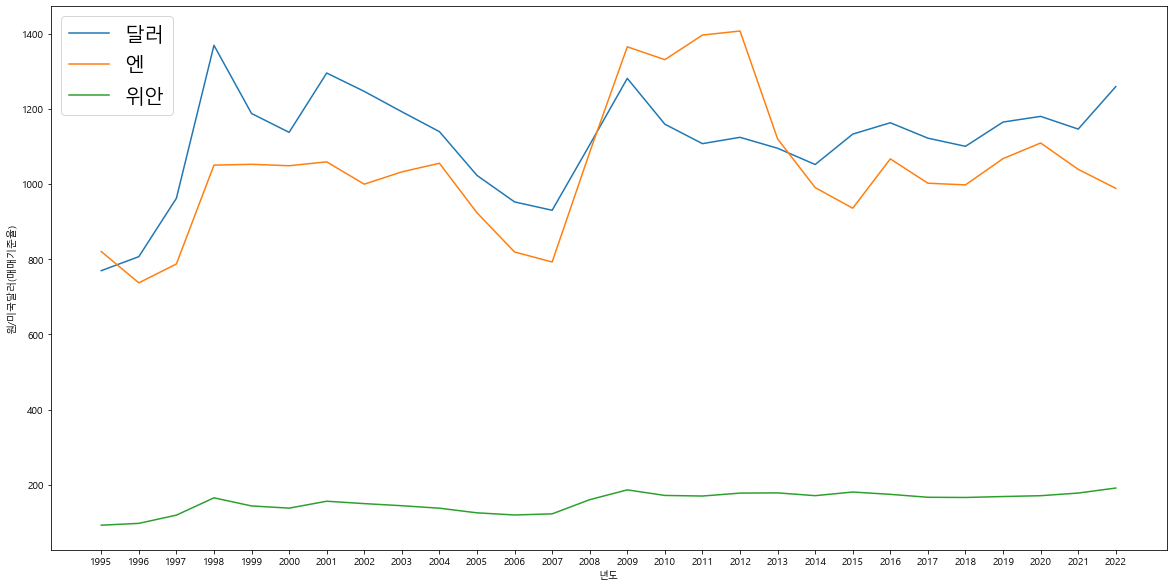

In [15]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='원/미국달러(매매기준율)', errorbar=None, legend=True)
sns.lineplot(df_korea, x='년도', y='원/일본엔(100엔)', errorbar=None, legend=True)
sns.lineplot(df_korea, x='년도', y='원/위안(매매기준율)', errorbar=None, legend=True)
plt.legend(['달러', '엔', '위안'], fontsize=20)
plt.show()

### → 환율이 크게 오른 시기 : 1997년, 2008년, 2022년
### → 경제가 침체되는 시기와 일치함
### → 하지만 세 시기 모두 동일한 추세를 보이기 때문에 외환위기와 경기불황을 구분하는 지표가 되기는 어려움

## 3) 경상수지

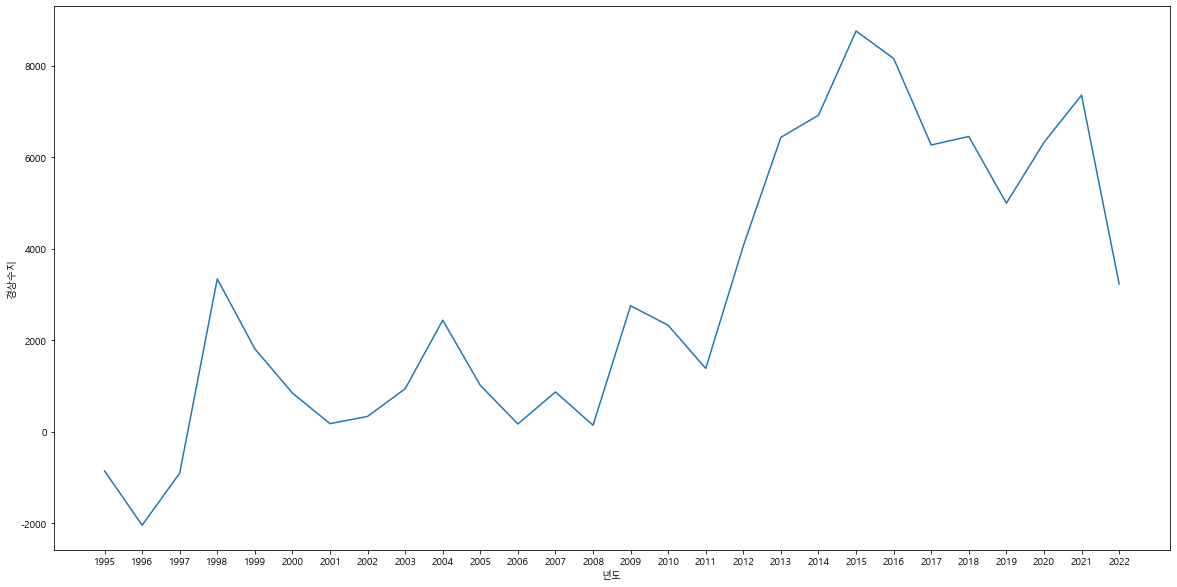

In [16]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='경상수지', errorbar=None)
plt.show()

### → 위 그래프에 대한 해석 작성

## 4) 외환보유액

## - 1997 ~ 2001 IMF 구제금융 요청(외환위기) 당시 한국의 외환보유액과 주변국 상황 비교

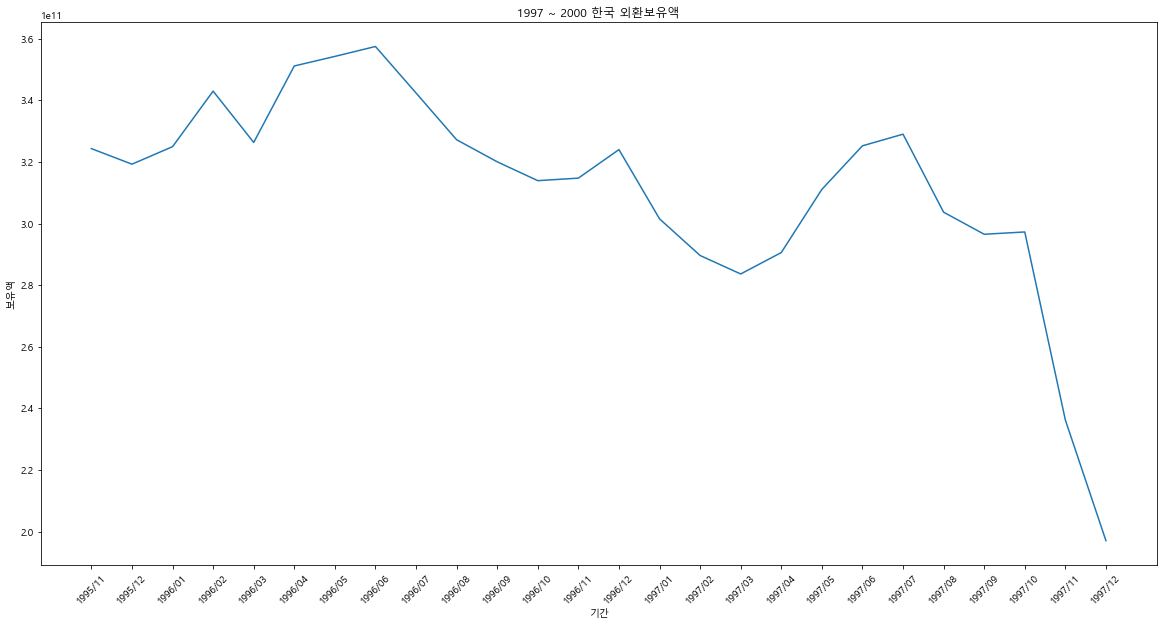

In [17]:
# IMF 당시 한국 외환보유액
plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_k, x='년월', y='한국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 한국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

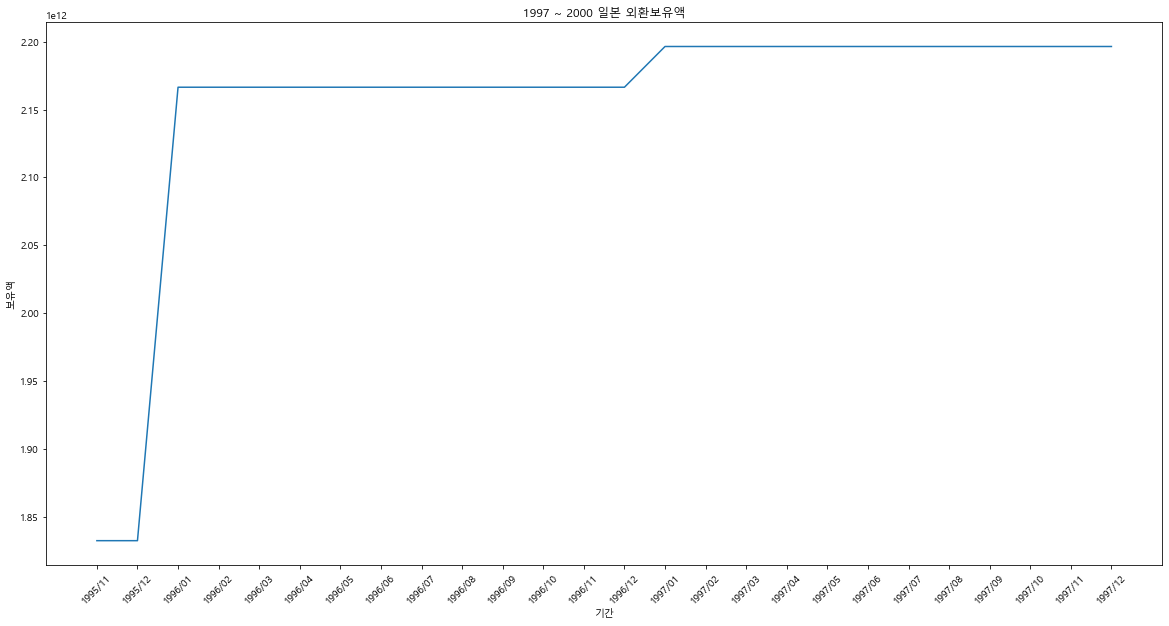

In [18]:
# IMF 당시 일본 외환보유액
IMF_j = df_japan.iloc[10:36, :]
IMF_j.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_j, x='년월', y='일본 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 일본 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

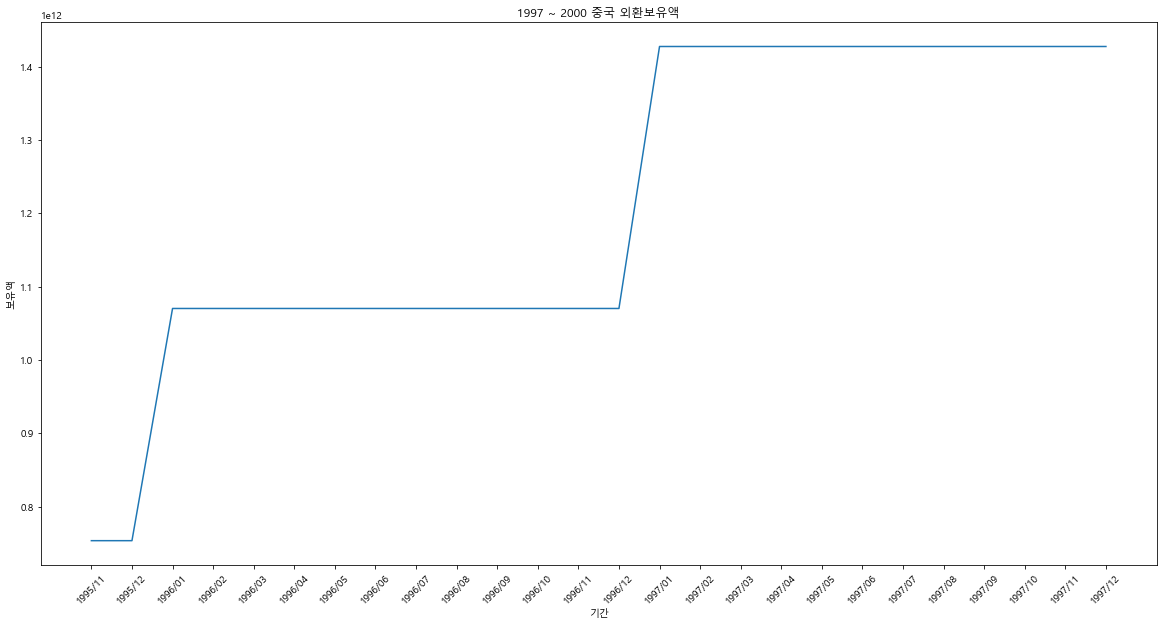

In [19]:
# IMF 당시 중국 외환보유액
IMF_c = df_china.iloc[10:36, :]
IMF_c.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_c, x='년월', y='중국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 중국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

### → 외환위기에 직면한 한국은 외환보유액이 급감하는 반면 중국과 일본은 상승하고 있음

## - 2008년 대침체(경제 불황) 당시 한국의 외환보유액과 주변국 상황 비교

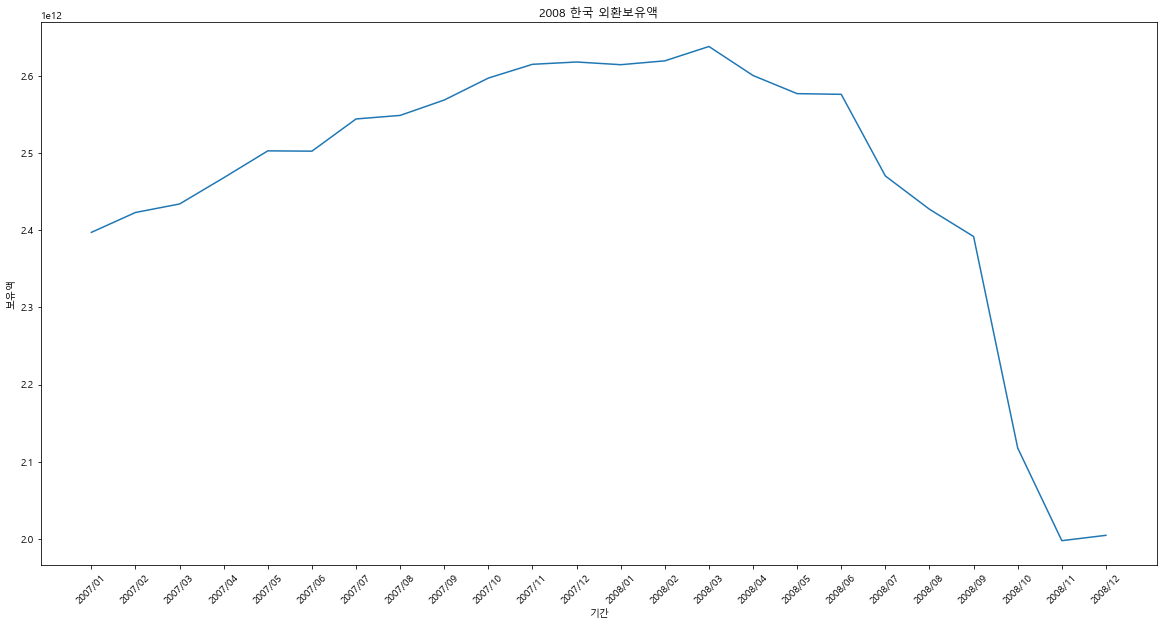

In [20]:
# 한국
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_dep, x='년월', y='한국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('2008 한국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

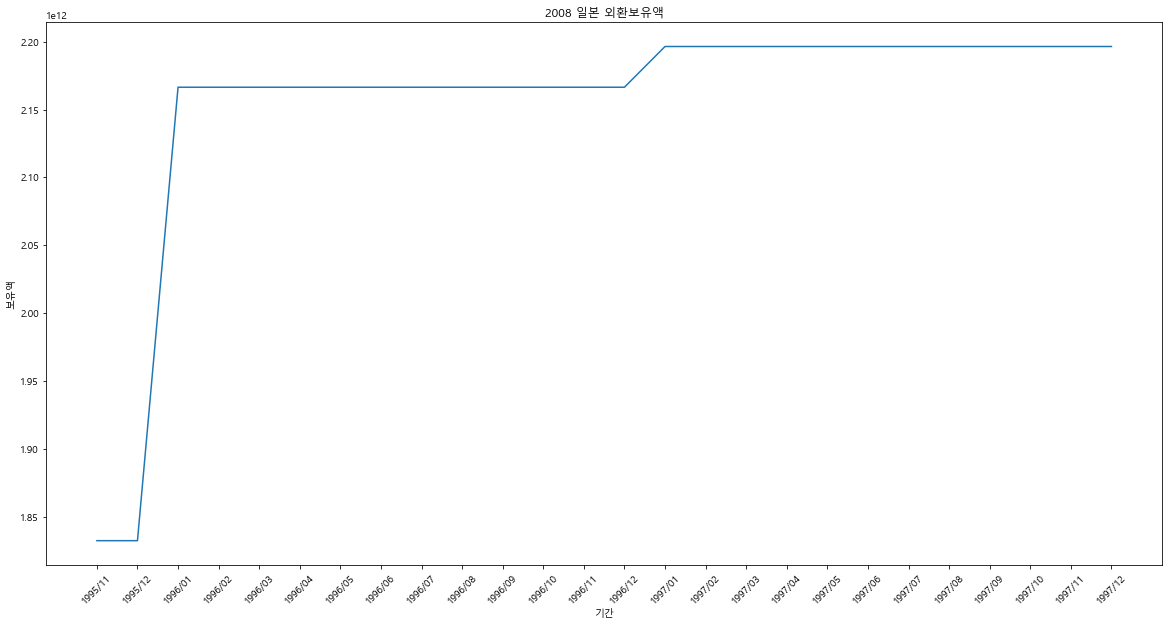

In [21]:
# 일본
glo_j = df_japan.iloc[144:168, :]
glo_j.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_j, x='년월', y='일본 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('2008 일본 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

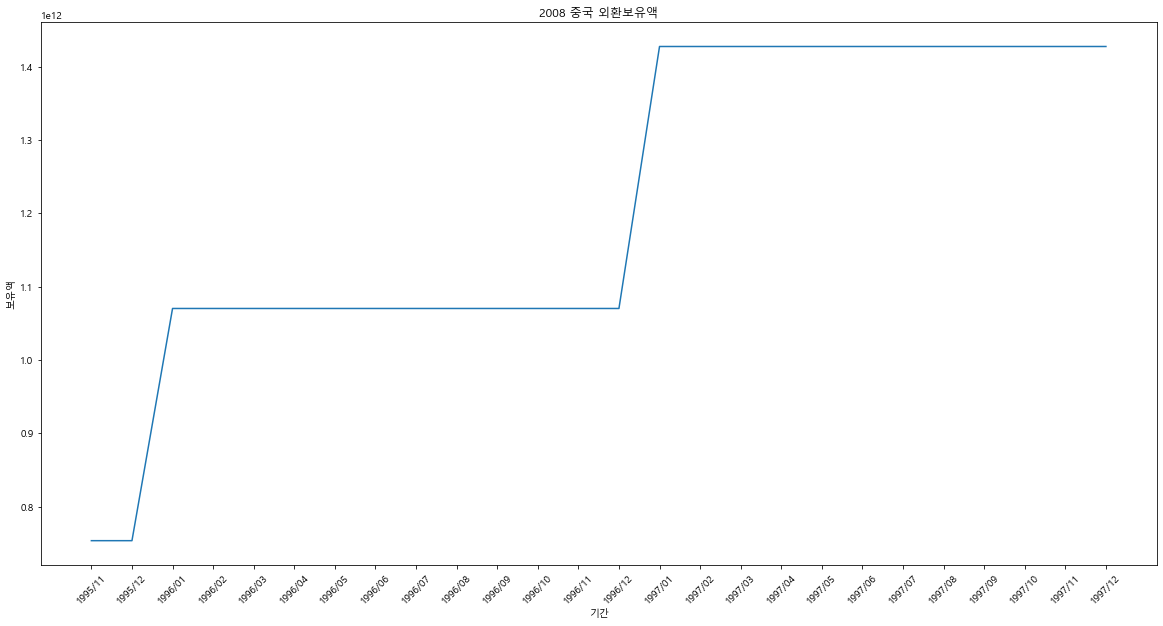

In [22]:
# 중국
glo_c = df_china.iloc[144:168, :]
glo_c.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_c, x='년월', y='중국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('2008 중국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

### → 시사하는 바 작성
### 
### 
### 
### 

## - IMF 구제금융 요청(1997), 대침체(2008), 현재(2022) → 세 시기의 외환보유액 추이 비교

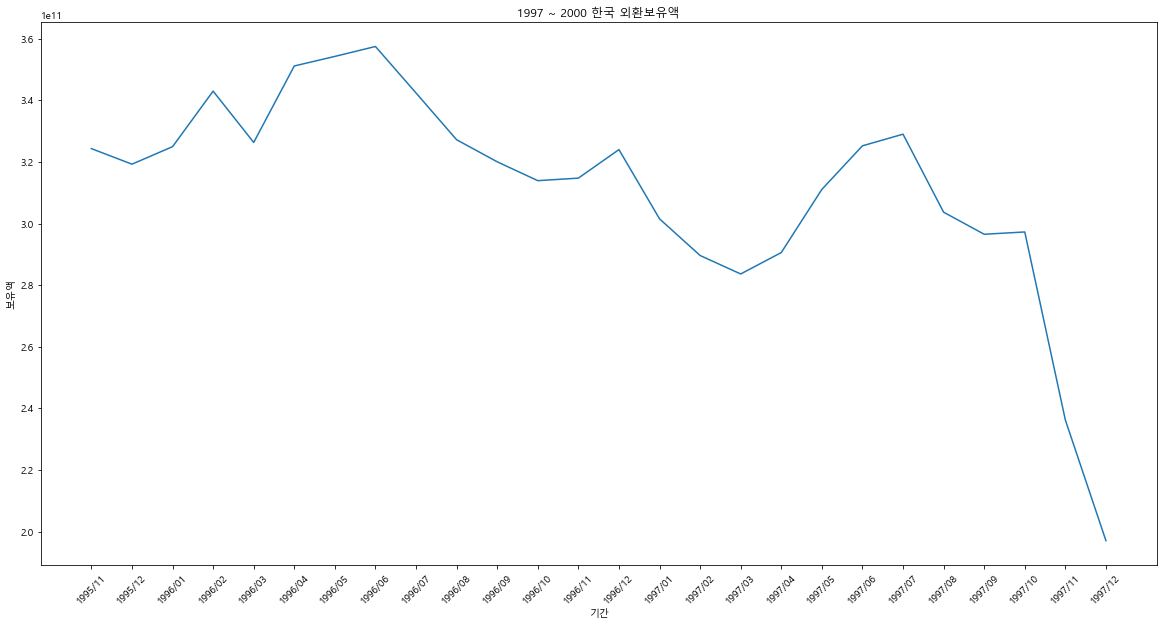

In [23]:
# IMF 당시 한국 외환보유액
plt.figure(figsize=(20, 10))
sns.lineplot(data=IMF_k, x='년월', y='한국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('1997 ~ 2000 한국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

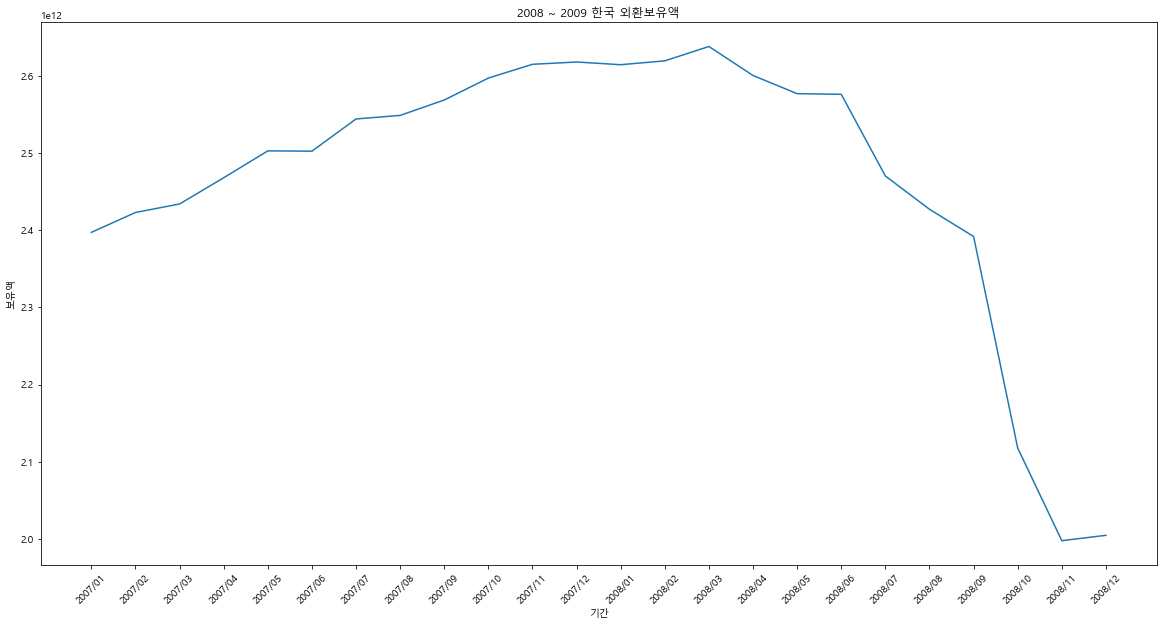

In [24]:
# 대침체 당시 한국 외환보유액
plt.figure(figsize=(20, 10))
sns.lineplot(data=global_dep, x='년월', y='한국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('2008 ~ 2009 한국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

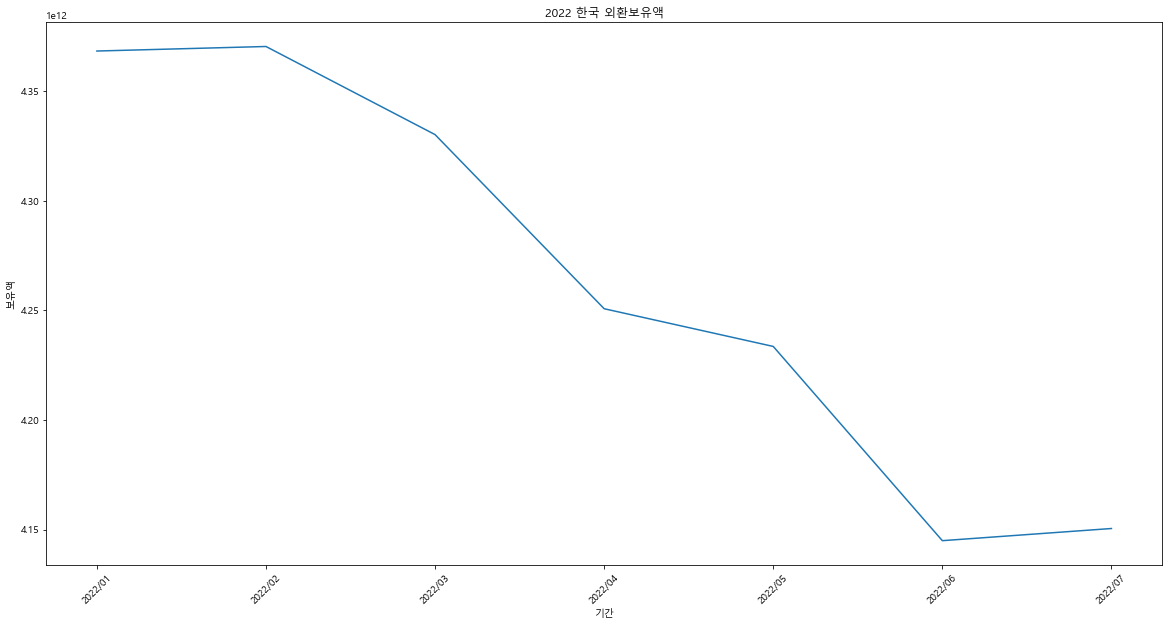

In [25]:
# 현재 한국 외환보유액
plt.figure(figsize=(20, 10))
sns.lineplot(data=ty, x='년월', y='한국 외환보유액(달러)')
plt.xticks(rotation=45)

plt.title('2022 한국 외환보유액')
plt.xlabel('기간')
plt.ylabel('보유액')
plt.show()

### → 세 시기 모두 외환보유액이 감소함을 알 수 있음

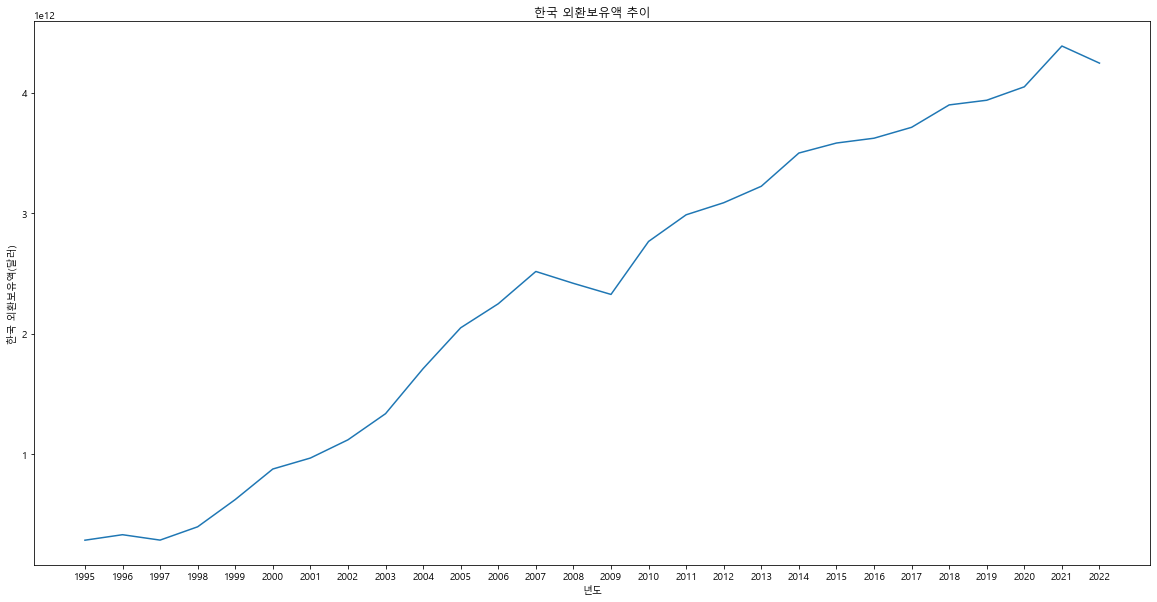

In [26]:
plt.figure(figsize=(20, 10))
sns.lineplot(df_korea, x='년도', y='한국 외환보유액(달러)', errorbar=None, legend=True)
plt.title('한국 외환보유액 추이')
plt.show()

### → 실제로 지난 30년간 한국의 외환보유액이 큰  추세를 보인 것은 1997년, 2008년, 2022년
### → 경제가 위기였던 시기라고 평가를 받았거나, 앞으로 위기일 것이라고 예측되는 시기와 일치함
### → 환율 지표와 같은 이유로 외환보유액 지표만으로는 외환위기와 경기침체의 차이를 구분할 수 없음

## 5)

## - 회귀분석